# __Working with Image Data__


## Steps to Be Followed:
1. Importing the necessary libraries
2. Reading and displaying the image
3. Displaying RGB channels
4. Flipping augmentation
5. Performing width shifting augmentation
6. Changing the brightness augmentation

### Step 1: Importing the Necessary Libraries
- Import the required libraries

In [7]:
# !pip install scikit-image
# !pip install tensorflow

In [8]:
import tensorflow as tf
import keras
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import expand_dims
# from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator

### Step 2: Reading and Displaying the Image
- Read an image file named **leopard.jpg** using the imread function from the **io** module
- Create a subplot figure with one plot
- Set the width of the figure to **15** inches
- Display the image on the plot using the **imshow** function from the pyplot module

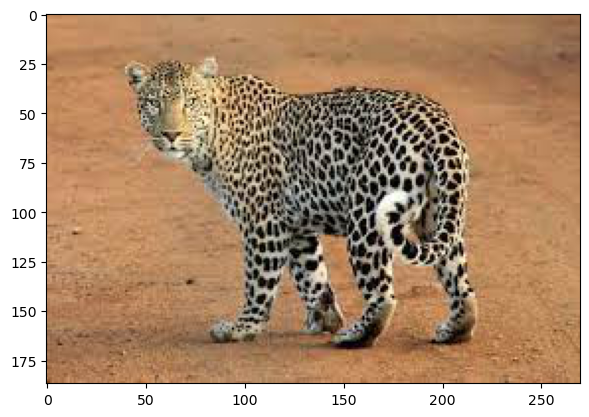

In [9]:
image = io.imread('../../Datasets/leopard.jpg')

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

__Observation:__
- The output is a plot showing the original image.

### Step 3: Displaying RGB Channels
- Create a plot with one row and four subplots using **subplots(1, 4, sharey=True)**
- Set the width of the figure to 20 using **set_figwidth(20)**
- Display the original image on the first subplot using **im1.imshow(image)**
- Display the red channel of the image on the second subplot using **im2.imshow(image[:, : , 0])**
- Display the green channel of the image on the third subplot using **im3.imshow(image[:, : , 1])**
- Display the blue channel of the image on the fourth subplot using **im4.imshow(image[:, : , 2])**
- Set the title of the figure as **Original and RGB image channels** using **i.suptitle('Original and RGB image channels')**

Text(0.5, 0.98, 'Original and RGB image channels')

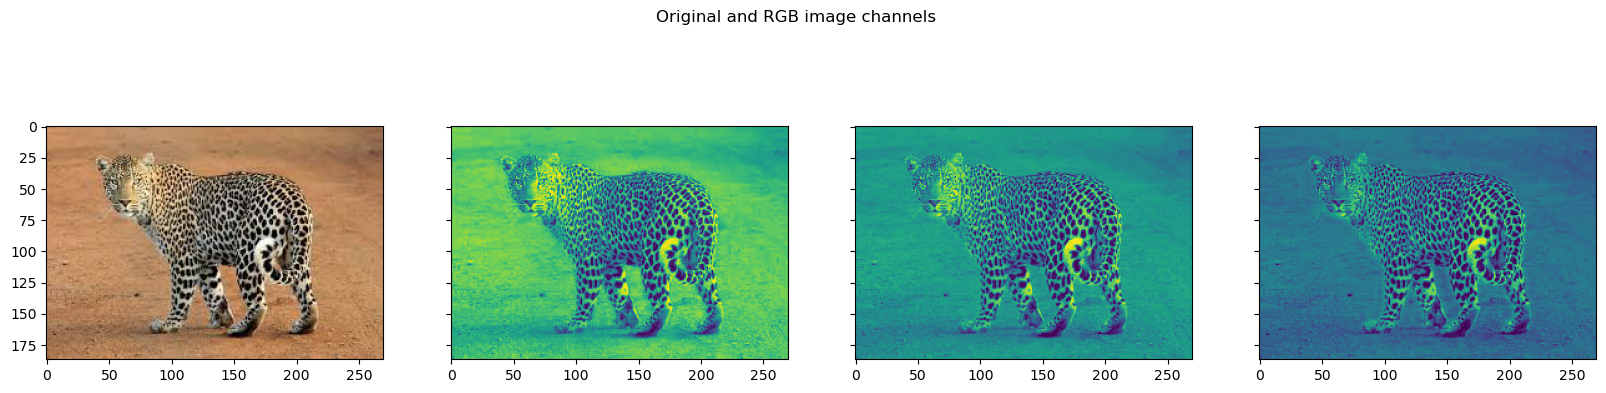

In [10]:

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)
im2.imshow(image[:, : , 0])
im3.imshow(image[:, : , 1])
im4.imshow(image[:, : , 2])
i.suptitle('Original and RGB image channels')

__Observation:__
- The output is a figure with four subplots showing the original image and its RGB channels.

### Step 4: Flipping Augmentation

Applying Horizontal and Vertical Shifting Augmentation to an Image
- The code defines an image augmentation technique called flipping
- The **expand_dims** function is used to add an extra dimension to the image array
- An **ImageDataGenerator** is created with **horizontal_flip=True** and **vertical_flip=True** parameters to enable flipping of the images
- The flow method of the datagen object is called with the samples array and a batch size of **1** to generate a batch of augmented images
- A subplot with **1** row and **3** columns is created with a figure size of **15x15**
- A loop is executed 3 times to generate and plot the augmented images
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the **it** iterator
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the __imshow__ method of the respective subplot

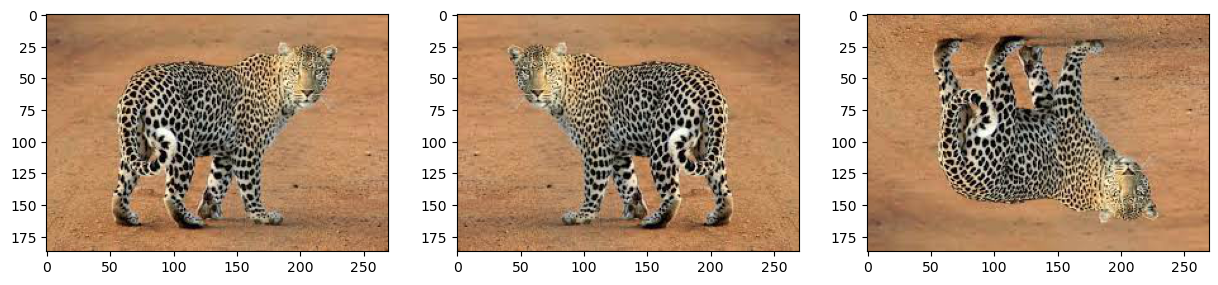

In [11]:
samples = expand_dims(image,0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)


__Observation:__
- The code generates and displays three flipped versions of the original image using horizontal and vertical flipping.

### Step 5: Performing Width Shifting Augmentation
- The code prepares the image for augmentation by adding an extra dimension using **expand_dims**
- An image data augmentation generator is created using **ImageDataGenerator** with a **width_shift_range** of **[-200, 200]**, which specifies the range of horizontal shift values
- An iterator is created using flow on the datagen object with the samples array and a batch size of **1**
- A subplot with **1** row and **3** columns is created with a figure size of **15x15**
- A loop is executed 3 times to generate and plot augmented images.
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the it iterator
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the __imshow__ method of the respective subplot

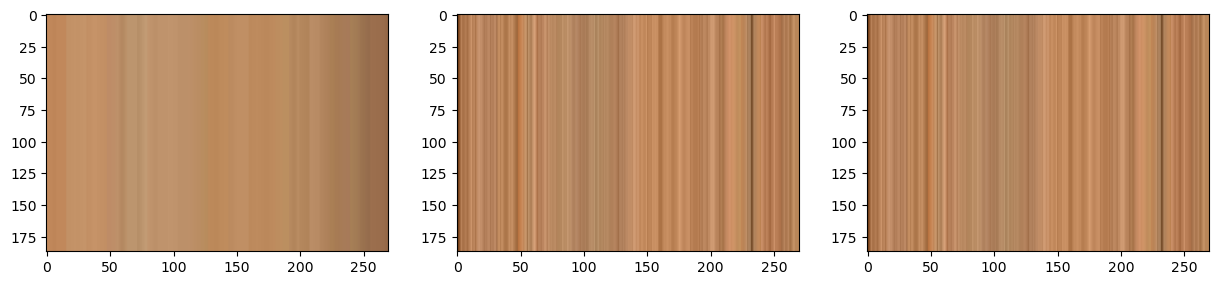

In [12]:
samples = expand_dims(image, 0)

datagen = ImageDataGenerator(width_shift_range=[-200,200])

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

__Observation:__
- The code generates and displays three horizontally shifted versions of the original image within the specified range **[-200, 200]**.

### Step 6: Changing the Brightness Augmentation
- An image data augmentation generator is created using **ImageDataGenerator** with a **brightness_range** of **[0.5, 2.0]**, which specifies the range of brightness values
- An iterator is created using flow on the datagen object with the samples array and a batch size of **1**
- A subplot with **1** row and **3** columns is created with a figure size of **15x15**
- A loop is executed 3 times to generate and plot augmented images
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the it iterator
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the imshow method of the respective subplot

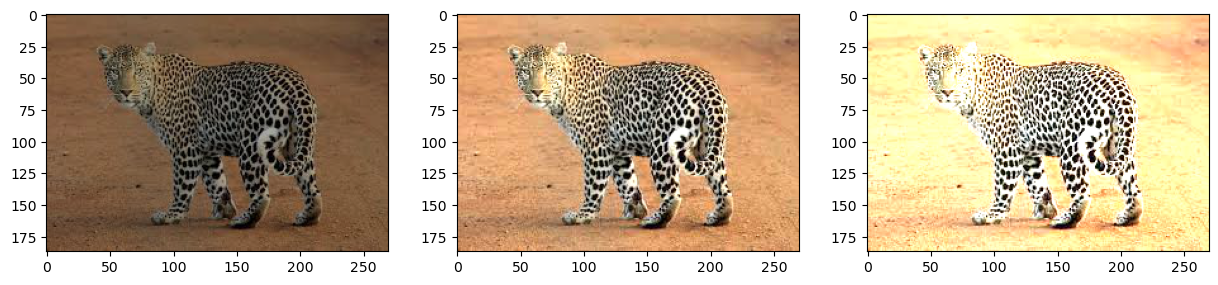

In [13]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

__Observation:__
- The code generates and displays three brightness-augmented versions of the original image within the specified brightness range __[0.5, 2.0]__.

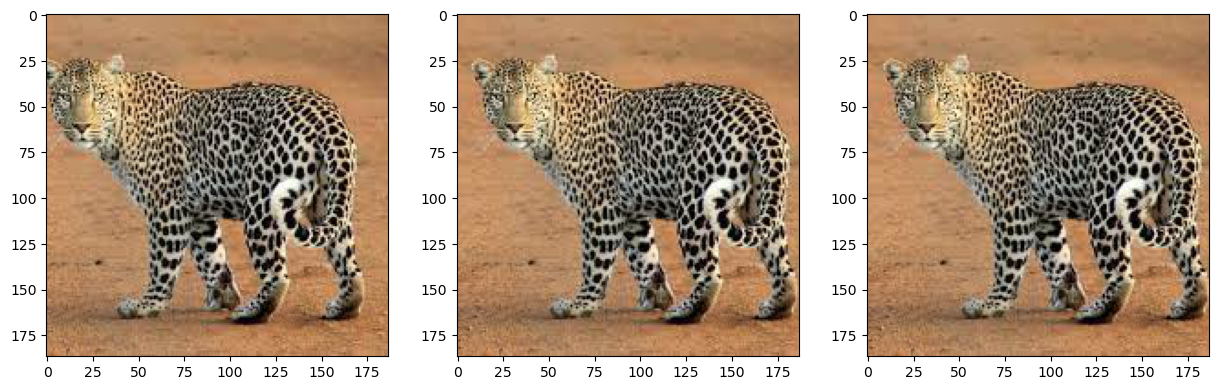

In [14]:
# Get the shape of the image

height, width, _ = image.shape

 

# Ensure the size of the crop is smaller or equal to the size of the image

crop_size = min(height, width)

 

# Create a dataset from the image

samples = tf.data.Dataset.from_tensor_slices([image])

 

# Define the data augmentation operation (random cropping)

datagen = samples.map(lambda x: tf.image.random_crop(x, size=[crop_size, crop_size, 3]))

 

# Create a subplot to display the augmented images

fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

 

# Display the augmented images

for i in range(3):

    modified_image = next(iter(datagen)).numpy().astype('uint8')

    im[i].imshow(modified_image)

plt.show()